In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
df = pd.read_csv(r"/Users/ahmedsherif/Downloads/cleaned_data1.csv")
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,34999
...,...,...,...,...,...,...,...,...,...,...,...
3555,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,25900
3556,Bentley,Continental GT Speed,2023,714,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,349950
3557,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,53900
3558,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,62999


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3560 non-null   object
 1   model         3560 non-null   object
 2   model_year    3560 non-null   int64 
 3   milage        3560 non-null   int64 
 4   fuel_type     3560 non-null   object
 5   engine        3560 non-null   object
 6   transmission  3560 non-null   object
 7   ext_col       3560 non-null   object
 8   int_col       3560 non-null   object
 9   accident      3560 non-null   object
 10  price         3560 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 306.1+ KB


In [312]:
df["brand"].value_counts().head(10)

brand
BMW              357
Ford             339
Mercedes-Benz    292
Chevrolet        272
Audi             183
Toyota           180
Porsche          167
Lexus            158
Jeep             130
Land             121
Name: count, dtype: int64

In [313]:
df["accident"] = df["accident"].map({"At least 1 accident or damage reported": 1, "None reported": 0})

In [314]:
df.groupby("brand")["accident"].sum().sort_values(ascending = False).head(10)

brand
Ford             96
BMW              82
Chevrolet        70
Mercedes-Benz    69
Lexus            57
Toyota           50
Audi             50
Nissan           34
Porsche          34
GMC              33
Name: accident, dtype: int64

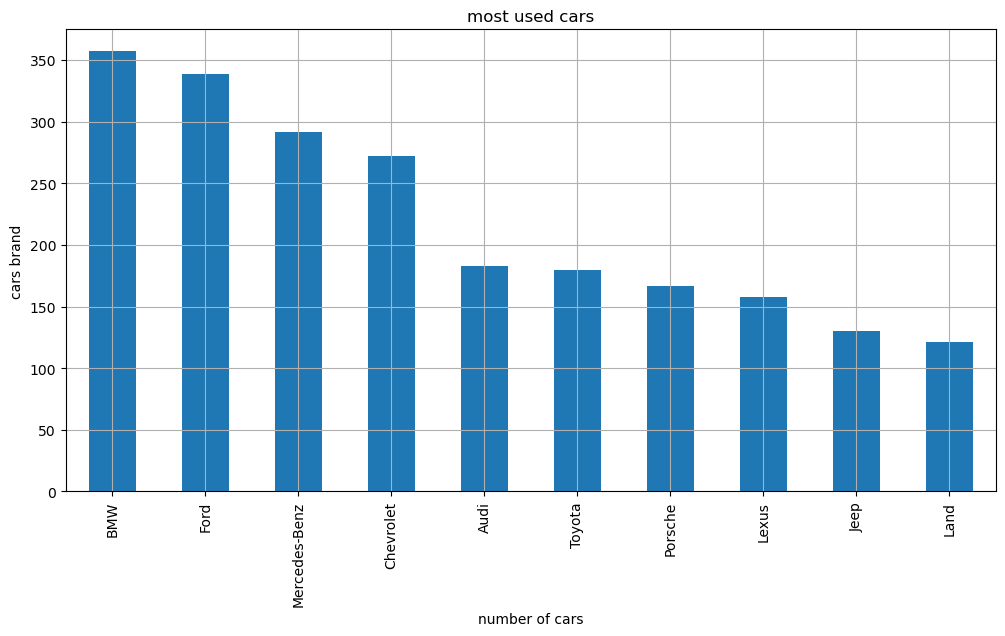

In [315]:
plt.figure(figsize = (12,6))
df["brand"].value_counts().head(10).plot(kind = "bar")
plt.xlabel("number of cars")
plt.ylabel("cars brand")
plt.title("most used cars")
plt.grid()

most used cars are : 1- BMW , 2-Ford , 3-mercedes

In [316]:
num_cars_damaged = df['accident'].value_counts()
num_cars_damaged

accident
0    2627
1     933
Name: count, dtype: int64

Text(0.5, 1.0, 'damaged vs not-damaged')

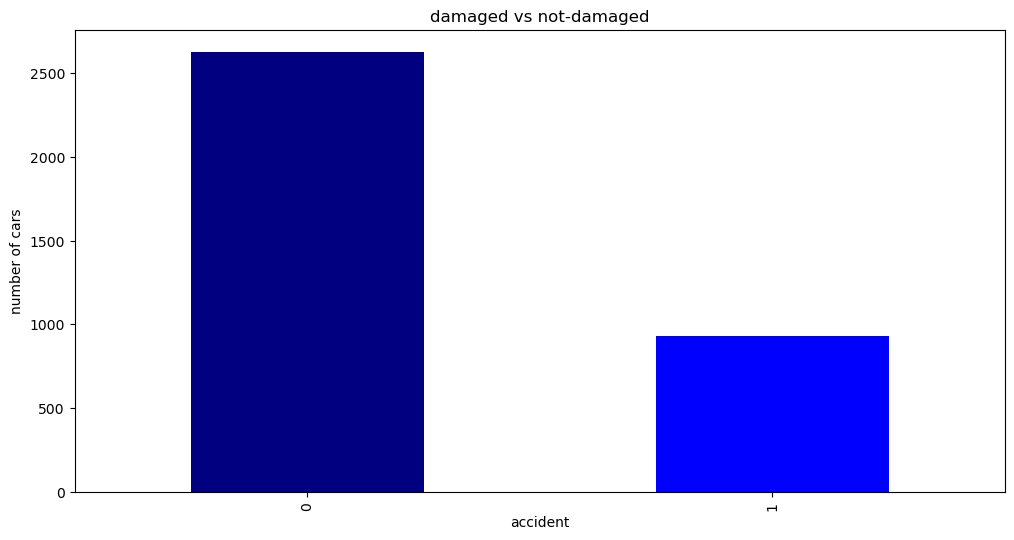

In [396]:
plt.figure(figsize = (12,6))
num_cars_damaged.plot(kind = "bar",color = ['navy', 'blue'])
plt.ylabel("number of cars")
plt.xlabel("accident")
plt.title("damaged vs not-damaged")


In [318]:
percent_cars_damaged = df["accident"].value_counts(normalize = True)*100
percent_cars_damaged

accident
0    73.792135
1    26.207865
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage of Damaged vs Non-Damaged Cars')

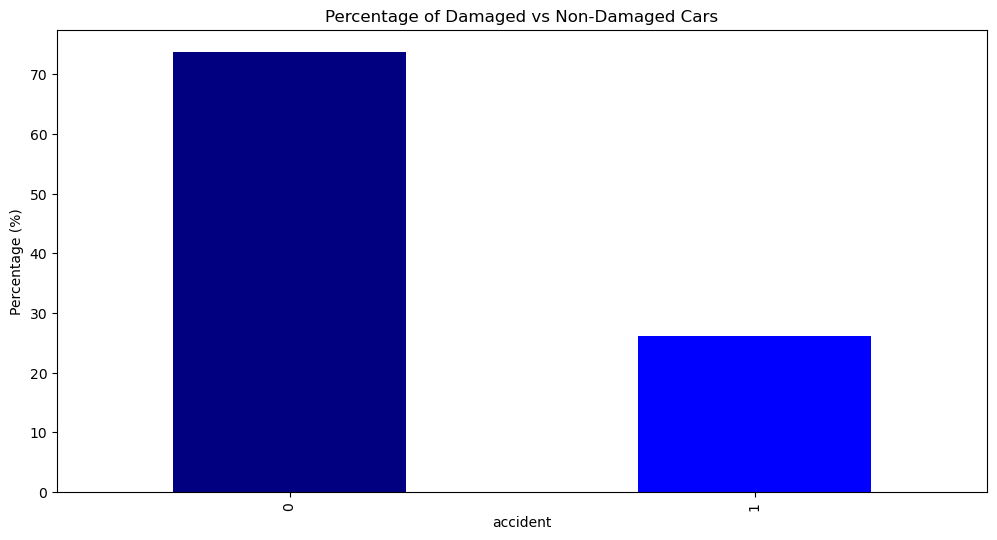

In [394]:
plt.figure(figsize = (12,6))
percent_cars_damaged.plot(kind = "bar")
percent_cars_damaged.plot(kind='bar', color=['navy', 'blue'])
plt.ylabel("Percentage (%)")
plt.title("Percentage of Damaged vs Non-Damaged Cars")



Text(0, 0.5, 'accident')

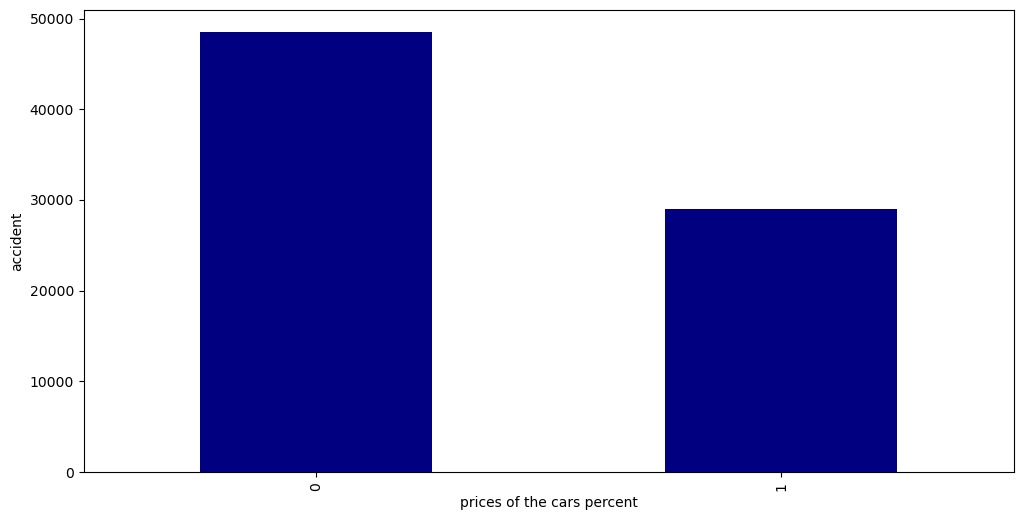

In [392]:
plt.figure(figsize = (12,6))
car_prices_damage = df.groupby("accident")["price"].mean()
car_prices_damage.plot(kind = "bar",color = "navy")
plt.xlabel("prices of the cars percent")
plt.ylabel("accident")


In [356]:
df["accident"]

0       At least 1 accident or damage reported
1       At least 1 accident or damage reported
2                                None reported
3                                None reported
4                                None reported
                         ...                  
3555    At least 1 accident or damage reported
3556                             None reported
3557                             None reported
3558                             None reported
3559    At least 1 accident or damage reported
Name: accident, Length: 3560, dtype: object

In [357]:
df["accident"] = df["accident"].map({"At least 1 accident or damage reported": 1, "None reported": 0})

In [358]:
least_safest_brands = df.groupby("brand")["accident"].sum().sort_values(ascending = False).head(10)

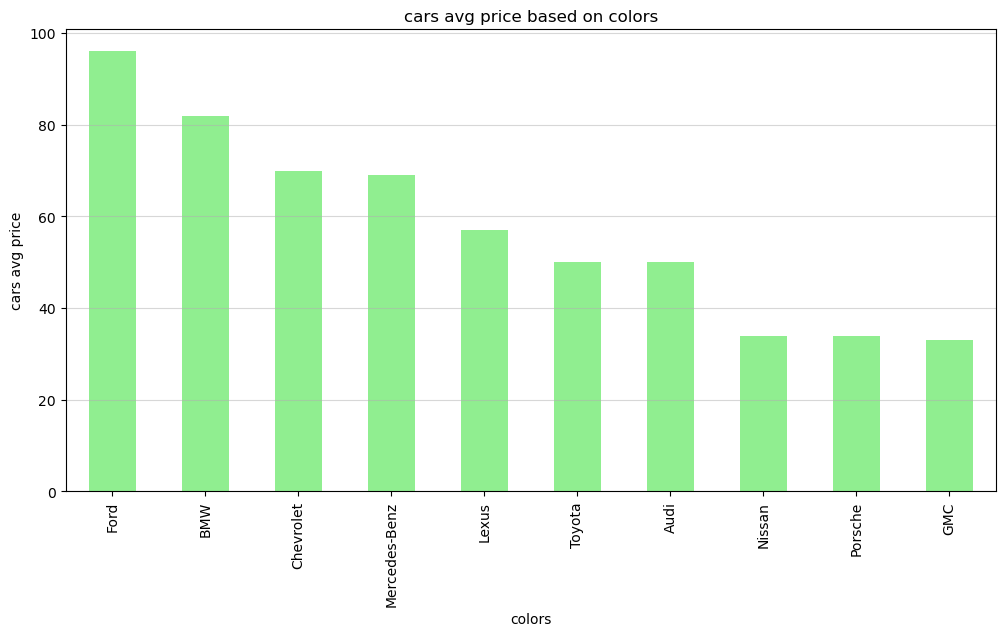

In [390]:
plt.figure(figsize = (12,6))
least_safest_brands.plot(kind = "bar",color = "lightgreen")
plt.ylabel("cars avg price")
plt.xlabel("colors")
plt.title("cars avg price based on colors")
plt.grid(axis="y", alpha=0.5)

accidents affects the cars prices 

In [362]:
safest_brands = df.groupby("brand")["accident"].sum().sort_values(ascending = True).head(10)
safest_brands

brand
smart          0
Lamborghini    0
McLaren        0
Plymouth       0
Genesis        0
Saab           0
Lotus          0
Bugatti        0
Rolls-Royce    1
Mercury        1
Name: accident, dtype: int64

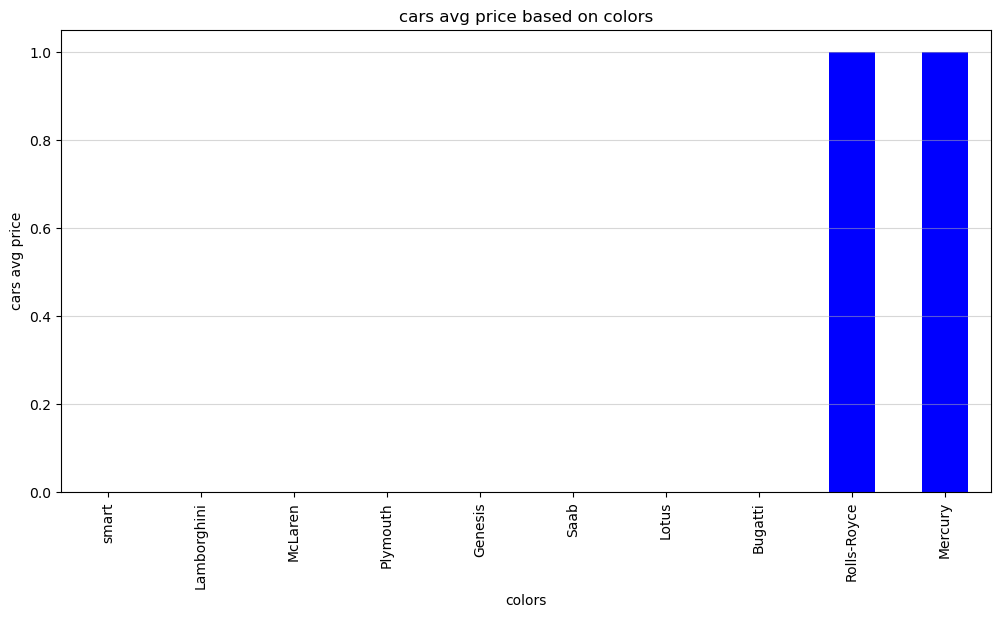

In [366]:
plt.figure(figsize = (12,6))
safest_brands.plot(kind = 'bar',color = "blue")
plt.ylabel("cars avg price")
plt.xlabel("colors")
plt.title("cars avg price based on colors")
plt.grid(axis="y", alpha=0.5)

In [327]:
df["int_col"].value_counts().head(20)

int_col
Black                  1869
Beige                   502
Gray                    436
Brown                   151
Red                     121
White                    89
Jet Black                53
Ebony                    43
Blue                     22
Orange                   19
Silver                   13
Global Black             11
Charcoal                 11
Gold                      9
Nero Ade                  9
Graphite                  8
Diesel Gray / Black       6
Green                     6
Charcoal Black            5
Parchment                 5
Name: count, dtype: int64

In [328]:
int_color_prices = df.groupby("int_col")["price"].median().sort_values(ascending = False).head(10)
int_color_prices

int_col
Charles Blue                695000.0
Black / Brown               489000.0
Brandy                      479995.0
Giallo Taurus / Nero Ade    399900.0
Hotspur                     294972.5
Porpoise                    289991.0
Nero Ade                    279991.0
Portland                    272950.0
Beluga                      269991.0
Bianco Polar                259991.0
Name: price, dtype: float64

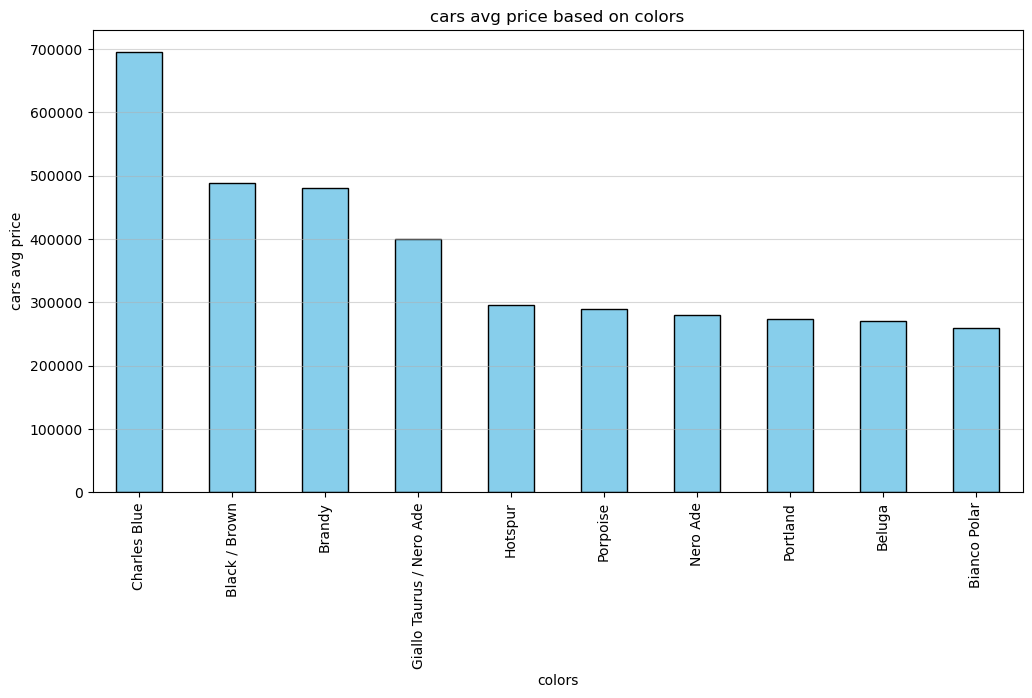

In [329]:
plt.figure(figsize=(12,6))
int_color_prices.plot(kind = "bar",color ='skyblue',edgecolor = "k")
plt.ylabel("cars avg price")
plt.xlabel("colors")
plt.title("cars avg price based on colors")
plt.grid(axis="y", alpha=0.5)

In [330]:
ex_color_prices = df.groupby("ext_col")["price"].median().sort_values(ascending = False).head(10)
ex_color_prices

ext_col
Balloon White             449991.0
China Blue                425000.0
Bianco Isis               399900.0
BLU ELEOS                 359991.0
Bianco Monocerus          359991.0
C / C                     349950.0
Granite                   289991.0
Bianco Icarus Metallic    288900.0
Arancio Borealis          279991.0
Matte White               279000.0
Name: price, dtype: float64

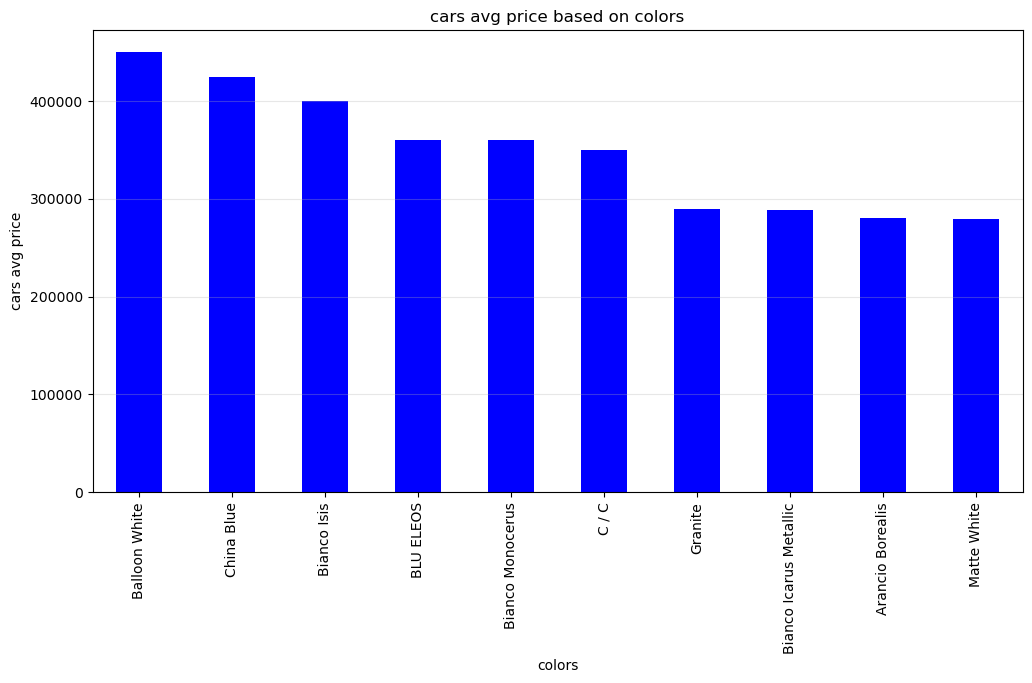

In [331]:
plt.figure(figsize=(12,6))
ex_color_prices.plot(kind = "bar",color ='blue')
plt.ylabel("cars avg price")
plt.xlabel("colors")
plt.title("cars avg price based on colors")
plt.grid(axis="y", alpha=0.3)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3560 non-null   object 
 1   model         3560 non-null   object 
 2   model_year    3560 non-null   int64  
 3   milage        3560 non-null   int64  
 4   fuel_type     3560 non-null   object 
 5   engine        3560 non-null   object 
 6   transmission  3560 non-null   object 
 7   ext_col       3560 non-null   object 
 8   int_col       3560 non-null   object 
 9   accident      0 non-null      float64
 10  price         3560 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 306.1+ KB


In [333]:
bins = [0,10000,25000,50000,75000,100000,df["milage"].max()]
labels = ["0-10K",'10K-25K','25K-50K','50K-75K','75K-100K','100K+']
price_for_milage = df.groupby(pd.cut(df["milage"], bins = bins , labels = labels))["price"].mean()

/var/folders/80/hdbs1lwn7tgcy1cvy3nyb3jh0000gn/T/ipykernel_783/2956456643.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_for_milage = df.groupby(pd.cut(df["milage"], bins = bins , labels = labels))["price"].mean()


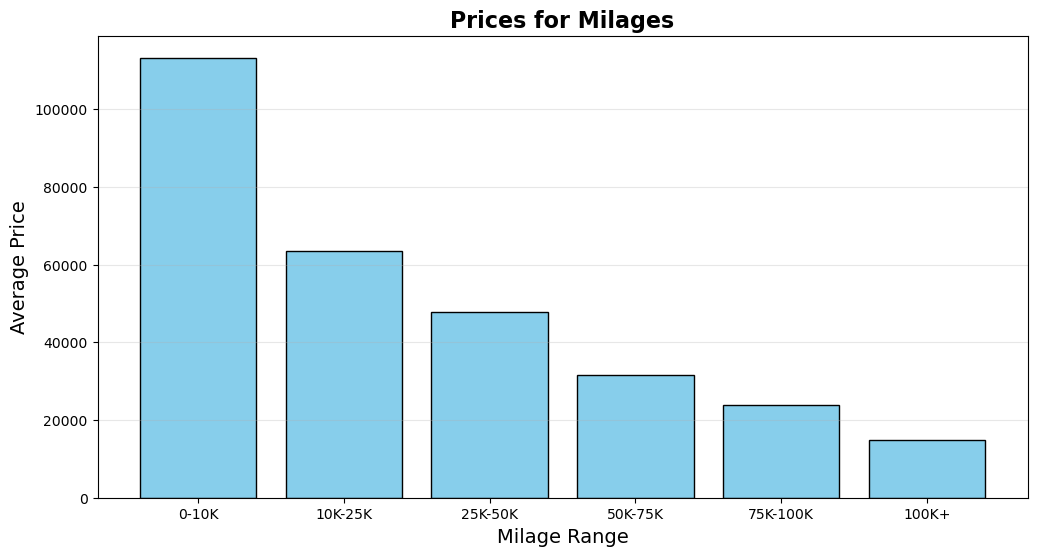

In [334]:
plt.figure(figsize=(12,6))
plt.bar(price_for_milage.index, price_for_milage.values, color="skyblue", edgecolor="k")
plt.title("Prices for Milages", fontsize=16, fontweight="bold")
plt.xlabel("Milage Range", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.grid(axis="y", alpha=0.3)


In [335]:
price_transmission = df.groupby("transmission")["price"].median().sort_values(ascending=False).head(10)
price_transmission

transmission
8-SPEED A/T                                      289991.0
7-Speed Manual                                   211949.5
Manual, 6-Spd                                    209000.0
8-Speed Automatic with Auto-Shift                198925.0
7-Speed Automatic with Auto-Shift                183900.0
9-Speed Automatic with Auto-Shift                143900.0
10-Speed Automatic with Overdrive                109900.0
Automatic, 8-Spd PDK Dual-Clutch                  99000.0
Automatic, 8-Spd Sport w/Sport & Manual Modes     91900.0
6-Speed Manual                                    84645.0
Name: price, dtype: float64

<Axes: xlabel='transmission'>

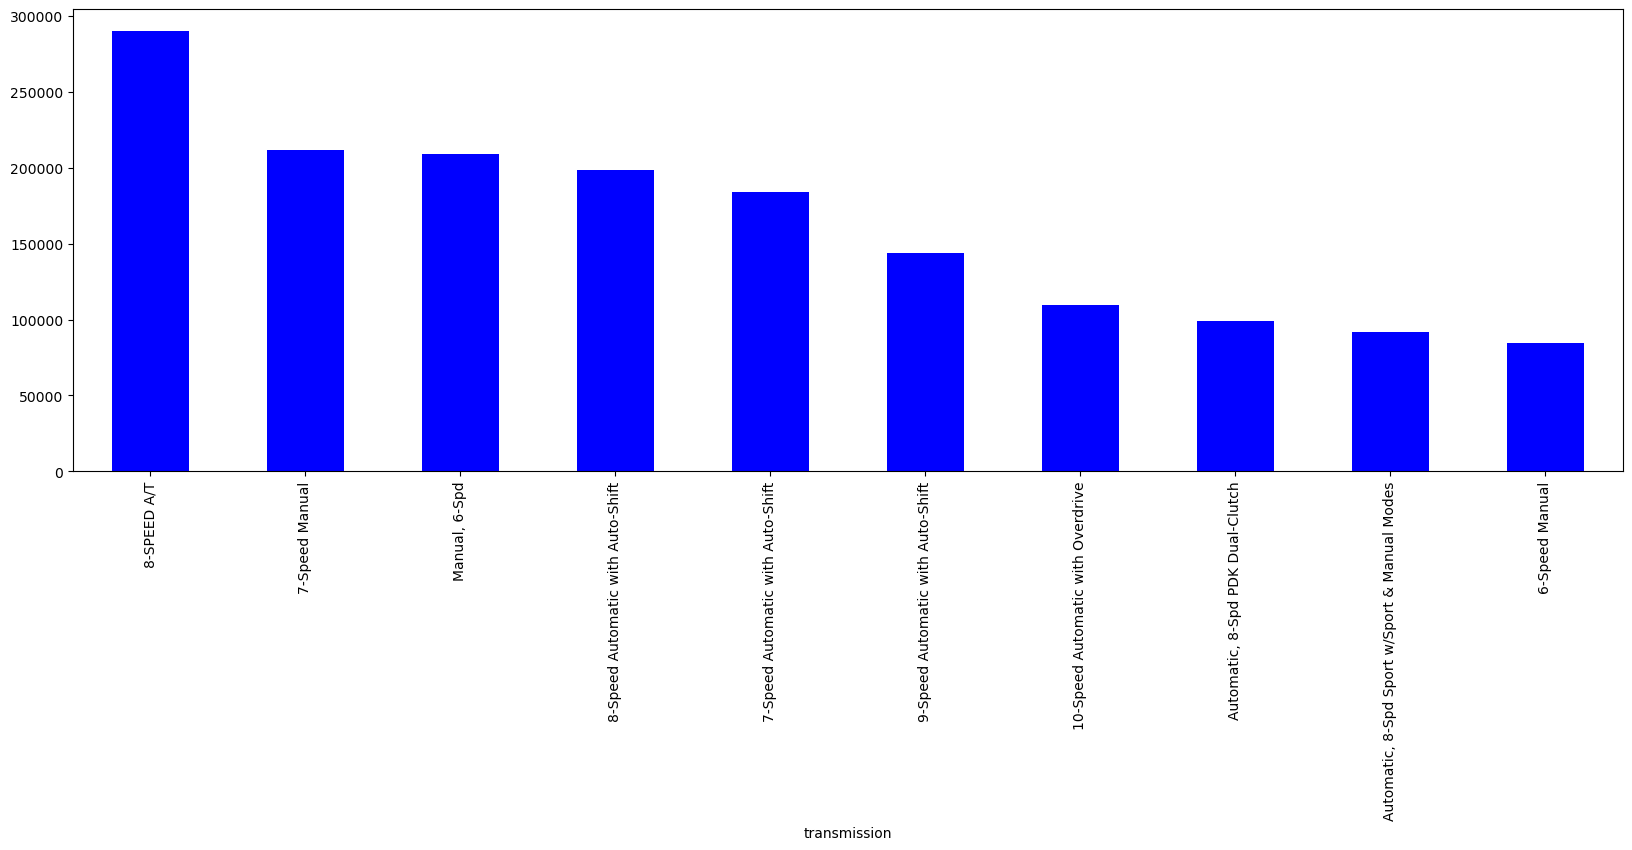

In [336]:
plt.figure(figsize=(20, 6))  
plt.grid()                   
price_transmission.plot(kind="bar", color="blue")  

In [372]:
"""most used engines"""
df["engine"].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             47
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             46
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    42
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             41
                                                         ..
121.0HP 1.8L 4 Cylinder Engine Gas/Electric Hybrid        1
480.0HP 5.0L 8 Cylinder Engine Gasoline Fuel              1
405.0HP 3.0L V6 Cylinder Engine Gasoline Fuel             1
Intercooled Turbo Premium Unleaded I-4 2.0 L/122          1
166.0HP 2.0L 4 Cylinder Engine Gasoline Fuel              1
Name: count, Length: 1060, dtype: int64

In [373]:
df["engine_size"] = df["engine"].str.extract(r"(\d+\.?\d*)L").astype(float)

In [374]:
df["engine_size"].fillna(df["engine_size"].mean(),inplace = True)

/var/folders/80/hdbs1lwn7tgcy1cvy3nyb3jh0000gn/T/ipykernel_783/2449774329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["engine_size"].fillna(df["engine_size"].mean(),inplace = True)


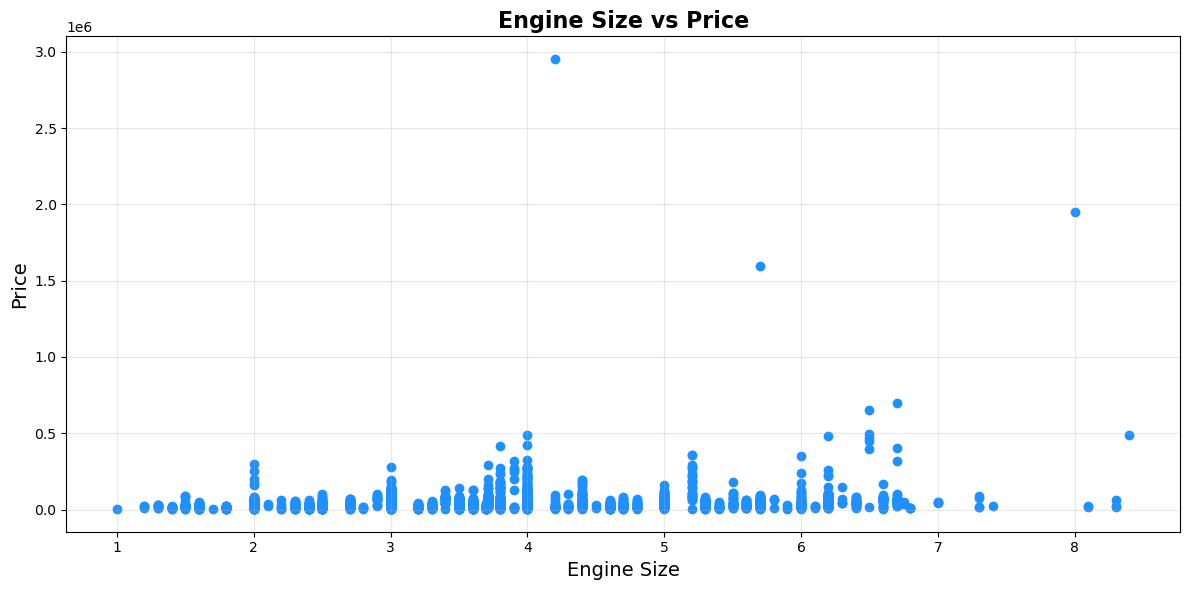

In [340]:
plt.figure(figsize=(12,6))
plt.scatter(df["engine_size"], df["price"],  color="dodgerblue")
plt.title("Engine Size vs Price", fontsize=16, fontweight="bold")
plt.xlabel("Engine Size", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [341]:
df["brand"].value_counts()

brand
BMW              357
Ford             339
Mercedes-Benz    292
Chevrolet        272
Audi             183
Toyota           180
Porsche          167
Lexus            158
Jeep             130
Land             121
Nissan           100
Cadillac          99
RAM               86
GMC               86
Dodge             80
Kia               68
Hyundai           64
Subaru            61
Acura             58
Honda             57
Mazda             55
INFINITI          55
Volkswagen        55
Lincoln           50
Jaguar            45
Volvo             35
Maserati          32
MINI              31
Bentley           30
Buick             30
Lamborghini       25
Chrysler          22
Mitsubishi        19
Genesis           18
Hummer            16
Alfa              15
Pontiac           15
Ferrari            9
Aston              8
Scion              6
McLaren            6
Rolls-Royce        6
FIAT               4
Saturn             4
Lotus              3
Saab               2
Mercury            2
Bugatti

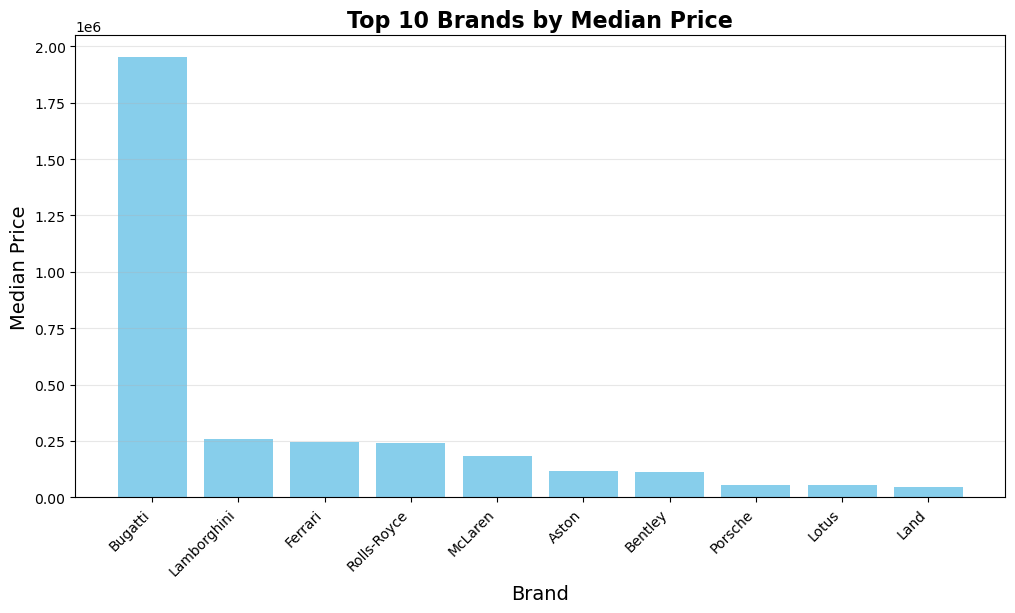

In [342]:
brand_prices = df.groupby("brand")["price"].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(brand_prices.index, brand_prices.values, color="skyblue")
plt.title("Top 10 Brands by Median Price", fontsize=16, fontweight="bold")
plt.xlabel("Brand", fontsize=14)
plt.ylabel("Median Price", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)


In [343]:
df["model_year"].value_counts()

model_year
2021    299
2022    291
2020    283
2018    279
2019    269
2016    248
2017    237
2015    213
2023    177
2014    168
2013    146
2012    126
2011    116
2008    106
2010     95
2007     93
2009     68
2005     67
2006     61
2004     57
2003     44
2002     31
2001     29
2000     15
1999     14
1998     10
1997      8
2024      6
1996      4
Name: count, dtype: int64

In [344]:
df["modern"] = (df["model_year"] >= 2017).astype(int)
df["old"] = (df["model_year"] < 2017).astype(int)


In [345]:
modern_price = df[df["modern"] == 1]["price"].median()
old_price = df[df["old"] == 1]["price"].median()

In [346]:
price_diffrence = modern_price/old_price
price_diffrence

2.5671764705882354

In [347]:
df[df["modern"] == 1].groupby("brand")["price"].median().head(10).sort_values(ascending = False)

brand
Bentley      188500.0
Aston        172053.0
BMW           54500.0
Cadillac      51900.0
Chevrolet     45000.0
Audi          44249.0
Acura         39898.0
Alfa          35345.0
Chrysler      32050.0
Buick         28222.0
Name: price, dtype: float64

In [348]:
df[df["old"] == 1].groupby("brand")["price"].mean().head(10).sort_values(ascending = False)

brand
Bugatti      1.950995e+06
Bentley      6.308369e+04
Aston        5.574750e+04
Audi         2.435114e+04
BMW          2.362656e+04
Chevrolet    2.111418e+04
Cadillac     1.718850e+04
Acura        1.370923e+04
Buick        1.195607e+04
Chrysler     1.038011e+04
Name: price, dtype: float64

In [349]:
df['milage'].sort_values(ascending = False)

2459    405000
1932    333361
3340    315000
28      300183
1013    300000
         ...  
447        195
3200       154
1496       124
1637       105
2683       100
Name: milage, Length: 3560, dtype: int64

In [350]:
df["low_milage"] = (df["milage"] <= 50000).astype(int)
df["high_milage"] = (df["milage"] > 50000).astype(int)

In [351]:
low_price = df[df["low_milage"] == 1]["price"].median()
high_price = df[df["high_milage"]==1]["price"].median()
comp = low_price / high_price
comp

2.5404864864864867

In [352]:
old_low_price = df[(df["low_milage"] == 1) & (df["old"] == 1)]["price"].median()
new_high_price = df[(df["high_milage"]== 1) & (df["modern"] == 1)]["price"].median()
price_ratio = old_low_price / new_high_price
price_ratio

1.0609275538041831

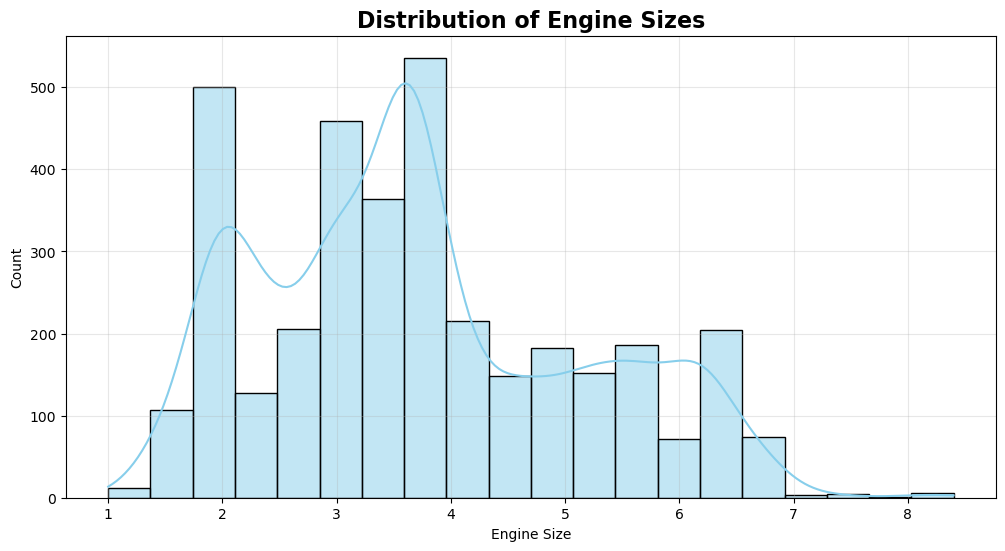

In [377]:
plt.figure(figsize=(12,6)) 
sns.histplot(df['engine_size'], bins=20, kde=True, color="skyblue")  
plt.title("Distribution of Engine Sizes", fontsize=16, fontweight="bold")
plt.xlabel("Engine Size")
plt.ylabel("Count")
plt.grid(alpha=0.3) 
plt.show()


In [383]:
avg_price_brand = df.groupby("brand")["price"].mean().sort_values(ascending=False).head(10)
avg_price_brand

brand
Bugatti        1.950995e+06
Rolls-Royce    2.876750e+05
Lamborghini    2.728852e+05
Ferrari        2.372987e+05
McLaren        2.134575e+05
Maserati       1.411252e+05
Bentley        1.373056e+05
Aston          1.254932e+05
Porsche        9.065417e+04
Lotus          5.841667e+04
Name: price, dtype: float64

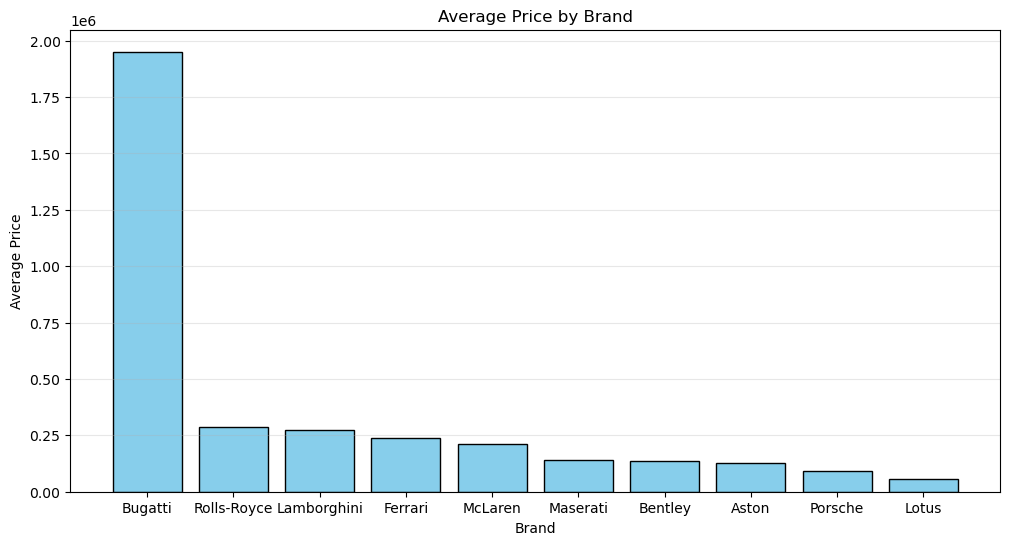

In [384]:
plt.figure(figsize=(12,6))
plt.bar(avg_price_brand.index, avg_price_brand.values, color="skyblue", edgecolor="k")
plt.title("Average Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.grid(axis="y", alpha=0.3)

In [385]:
avg_price_model = df.groupby("model")["price"].mean().sort_values(ascending=False)

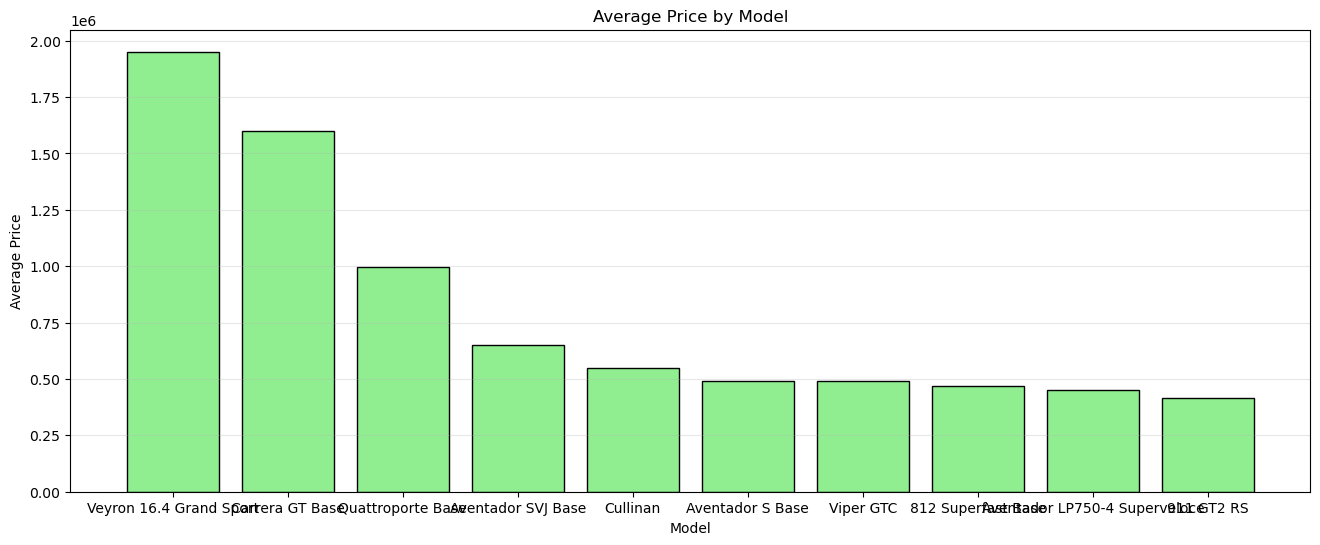

In [388]:
plt.figure(figsize=(16,6))
plt.bar(avg_price_model.head(10).index, avg_price_model.head(10).values, color="lightgreen", edgecolor="k")
plt.title("Average Price by Model")
plt.xlabel("Model",)
plt.ylabel("Average Price")
plt.grid(axis="y", alpha=0.3)

1 - Are non-damaged cars more expensive?
none damaged cars more expensive than the damaged cars


2 - Accident distribution by brand and model — which brands are safer?


3 - Percentage of cars with accidents
27%


4 - Effect of exterior and interior color on price (ext_col, int_col)
int and ext colors affects the car's price

done

5 - Average price by exterior color (ext_col)
done

6 - Average price by interior color (int_col)
done


7 - Do low-mileage cars have higher prices?
cars with low-milage is more expensive than those with higher ones


8 - Effect of transmission on price
better transmissions = higher price

9 - Are cars with bigger engines more expensive?
no clear relation between engine size and the price

10 - Do certain models retain their price better?
yes

11 - Are older cars in good condition more expensive than mid-age models?

yes,slightly


12 - Engine size distribution
done

13 - Average price by brand
done

14 - Average price by model
done
